In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pathlib import Path

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 15

In [2]:
# ===========================
# 		Usefull paths
# ===========================

# Data folders
data_folder = Path('../Apartado1')
C11_folder = data_folder / 'C11'
N13_folder = data_folder / 'N13'
O15_folder = data_folder / 'O15'
F18_folder = data_folder / 'F18'
Ga68_folder = data_folder / 'Ga68'
Rb82_folder = data_folder / 'Rb82'

# Test
test_folder = Path('../PET-resultados')

# Plots output folder
figures_folder = Path('Figures')

# ===========================

# Energy file name
energy_file = 'ini-ene.his'
anniquilation_file = 'ann-pos.his'

# Output folder (text files)
output_folder = Path('Outputs')

# Apartado 1

In [3]:
def read_his(path, sep, skiprows, col_names):
	return pd.read_csv(path, sep=sep, skiprows=skiprows, names=col_names)

In [4]:
def plot_ene_his(*datas, labels, colors, title, xlabel, ylabel, save=False, save_name=None):
	plt.figure(figsize=(10, 6))
	for i, data in enumerate(datas):
		plt.errorbar(data['Energy'], data['Norm.Prob'], yerr=data['Norm.Error'], fmt='None', label=labels[i], color=colors[i], capsize=3)
		plt.plot(data['Energy'], data['Norm.Prob'], color=colors[i])

	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.legend()
	
	
	if save:
		plt.savefig(save_name, format='pdf')

	# plt.show()

In [5]:
def plot_ene_eq(*datas, labels, colors, title, xlabel, ylabel, save=False, save_name=None):
	plt.figure(figsize=(10, 6))
	for i, data in enumerate(datas):
		plt.errorbar(data['Energy'], data['Eq.Prob'], yerr=data['Eq.Error'], fmt='None', label=labels[i], color=colors[i], capsize=3)
		plt.plot(data['Energy'], data['Eq.Prob'], color=colors[i])

	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.legend()
	
	
	if save:
		plt.savefig(save_name, format='pdf')

	# plt.show()

In [6]:
def normalize_prob_error(data):
	data['Norm.Prob'] = data['Prob'] / data['Prob'].sum()
	data['Norm.Error'] = data['Error'] / data['Prob'].sum()
	data['Eq.Prob'] = data['Prob'] / data['Prob'].max()
	data['Eq.Error'] = data['Error'] / data['Prob'].max()
	return data

In [7]:
def media_error(data):
	media = (data['Norm.Prob'] * data['Energy']).sum()
	error = np.sqrt(((data['Norm.Error'] * data['Energy'])**2).sum())
	return media, error

In [8]:
def df_media_error(isotopes, means, errors):
	df = pd.DataFrame({'Isótopo': isotopes, 'Media (keV)': means, 'Error (keV)': errors})
	df['Media (keV)'] = df['Media (keV)'].round(0)
	df['Error (keV)'] = df['Error (keV)'].round(0)
	return df

In [9]:
def emission_hardcoded():
# Create the data as a dictionary
	data = {
		'Isótopo': ['C11', 'N13', 'O15', 'F18', 'Ga68', 'Rb82'],
		't_medio (min)': [20.36, 9.97, 2.04, 109.73, 67.83, 1.27],
		'Emax (MeV)': [0.96, 1.20, 1.74, 0.63, 1.90, 3.38]
	}

	df = pd.DataFrame(data)
	df['Emax (keV)'] = df['Emax (MeV)'] * 1000

	return df

In [10]:
def plot_regg_media_emax(df, save=False, save_name=None):

	# Linear regression
	results = stats.linregress(df['Emax (keV)'], df['Media (keV)'])

	# Plot
	x = np.linspace(df['Emax (keV)'].min(), df['Emax (keV)'].max(), 100)
	y = results.intercept + results.slope * x
	r2 = results.rvalue**2

	print(f"Resultados ajuste lineal:")
	print(f"Pendiente: {results.slope:.5f} ± {results.stderr:.5f}")
	print(f"Intercepto: {results.intercept:.5f} ± {results.intercept_stderr:.5f}")
	print(f"Coeficiente de correlación: {results.rvalue:.5f}")
	print(f"Coeficiente de determinación: {r2:.5f}")
	


	plt.figure(figsize=(10, 6))
	plt.errorbar(df['Emax (keV)'], df['Media (keV)'], yerr=df['Error (keV)'], fmt='o', capsize=4, label='Datos')
	plt.plot(x, y, 'r--', label=f'Ajuste lineal')
	plt.title('Energía media detectada frente a energía máxima de emisión')
	plt.xlabel('Energía máxima (keV)')
	plt.ylabel('Energía media (keV)')

	plt.legend()

	if save:
		plt.savefig(save_name, format='pdf')

	# plt.show()

In [24]:
def main1():
	col_names = ['Energy', 'Prob', 'Error']
	sep = r'\s+'
	skiprows = 1

	# Read energy files
	C11_energy = read_his(C11_folder / energy_file, sep, skiprows, col_names)
	C11_energy = normalize_prob_error(C11_energy)
	N13_energy = read_his(N13_folder / energy_file, sep, skiprows, col_names)
	N13_energy = normalize_prob_error(N13_energy)
	O15_energy = read_his(O15_folder / energy_file, sep, skiprows, col_names)
	O15_energy = normalize_prob_error(O15_energy)
	F18_energy = read_his(F18_folder / energy_file, sep, skiprows, col_names)
	F18_energy = normalize_prob_error(F18_energy)
	Ga68_energy = read_his(Ga68_folder / energy_file, sep, skiprows, col_names)
	Ga68_energy = normalize_prob_error(Ga68_energy)
	Rb82_energy = read_his(Rb82_folder / energy_file, sep, skiprows, col_names)
	Rb82_energy = normalize_prob_error(Rb82_energy)

	# Plot energy files

	# Params for one plot
	datas = [C11_energy, N13_energy, O15_energy, F18_energy, Ga68_energy, Rb82_energy]
	labels = ['C11', 'N13', 'O15', 'F18', 'Ga68', 'Rb82']
	colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
	save_name = figures_folder / 'espectro_norm_todo.pdf'

	# Calculate mean and error for each isotope
	isotopes = ['$^{11}$C', '$^{13}$N', '$^{15}$O', '$^{18}$F', '$^{68}$Ga', '$^{82}$Rb']
	iso = ['C11', 'N13', 'O15', 'F18', 'Ga68', 'Rb82']
	means = []
	errors = []
	for data in datas:
		mean, error = media_error(data)
		means.append(mean)
		errors.append(error)

	# Save mean and error to a file
	df = df_media_error(iso, means, errors)
	# print(df)
	# df.to_latex(output_folder / 'medias_errores.tex', index=False)

	emission_data = emission_hardcoded()
	# print(emission_data)

	# Merge both dataframes
	df = pd.merge(df, emission_data, on='Isótopo')
	print(df)	


	# Params for 2 plots
	datas1 = [C11_energy, N13_energy, F18_energy]
	labels1 = ['C11', 'N13', 'F18']
	colors1 = ['blue', 'green', 'purple']
	save_name1 = figures_folder / 'espectro_norm1.pdf'
	
	datas2 = [O15_energy, Ga68_energy, Rb82_energy]
	labels2 = ['O15', 'Ga68', 'Rb82']
	colors2 = ['red', 'orange', 'brown']
	save_name2 = figures_folder / 'espectro_norm2.pdf'

	# Common params
	xlabel = 'Energía (keV)'
	ylabel = r'Densidad de probabilidad $\left[ \frac{1}{keV} \right]$'
	title = 'Espectro de energía para distintos radioisótopos'

	# Save?
	save = True

	# plot_regg_media_emax(df, save=save, save_name=figures_folder / 'regresion_media_emax.pdf')

	# # In two plots
	# plot_ene_his(*datas1, labels=labels1, colors=colors1, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=save_name1)
	# plot_ene_his(*datas2, labels=labels2, colors=colors2, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=save_name2)

	# # In one plot
	# plot_ene_his(*datas, labels=labels, colors=colors, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=save_name)

	# # Equalized peaks
	# plot_ene_eq(*datas, labels=labels, colors=colors, title=title, xlabel=xlabel, ylabel=ylabel, save=save, save_name=figures_folder / 'espectro_eq.pdf')

In [25]:
# main1()

# Apartado 2

In [26]:
def normalize_data(data, col_names_to_normalize):
	for column in col_names_to_normalize:
		new_col_name = 'Norm.' + str(column)
		data[new_col_name] = data[column]/data[column].sum()

	return

In [27]:
def read_ann(path, sep, skiprows, col_names, normalize=True, cols_to_normalize=None):
	data = pd.read_csv(path, sep=sep, skiprows=skiprows, names=col_names)
	if normalize:
		normalize_data(data, cols_to_normalize)
	return data

In [28]:
def medias_hardcoded(write=False, path=None):
	data_medias = {
		'Isótopo': ['F18', 'C11', 'N13', 'O15', 'Ga68', 'Rb82'],
		'Media (keV)': [254, 385, 493, 740, 838, 1534],
		'Error (keV)': [1, 2, 2, 3, 3, 5]
	}

	data_medias = pd.DataFrame(data_medias)

	if write:
		data_medias.to_csv(path, index=False)

	return data_medias

In [29]:
def r_media_error(data):
	media = (data['Norm.Cuentas'] * data['r']).sum()
	error = np.sqrt((data['r'] * (data['Norm.Error'])**2).sum())

	return media, error

In [65]:
def medias_df(isotopes, medias, errors):
	df = pd.DataFrame({'Isótopo': isotopes, 'Media (cm)': medias, 'Error (cm)': errors})
	
	return df

In [80]:
# Params
sep=r'\s+'
skiprows = 1
col_names = ['r', 'Cuentas', 'Error']

normalize = True
cols_to_normalize = col_names[-2:]

# Read data
C11_ann = read_ann(C11_folder / anniquilation_file, sep=sep, skiprows=skiprows, col_names=col_names, normalize=normalize, cols_to_normalize=cols_to_normalize)
F18_ann = read_ann(F18_folder / anniquilation_file, sep=sep, skiprows=skiprows, col_names=col_names, normalize=normalize, cols_to_normalize=cols_to_normalize)
N13_ann = read_ann(N13_folder / anniquilation_file, sep=sep, skiprows=skiprows, col_names=col_names, normalize=normalize, cols_to_normalize=cols_to_normalize)
O15_ann = read_ann(O15_folder / anniquilation_file, sep=sep, skiprows=skiprows, col_names=col_names, normalize=normalize, cols_to_normalize=cols_to_normalize)
Ga68_ann = read_ann(Ga68_folder / anniquilation_file, sep=sep, skiprows=skiprows, col_names=col_names, normalize=normalize, cols_to_normalize=cols_to_normalize)
Rb82_ann = read_ann(Rb82_folder / anniquilation_file, sep=sep, skiprows=skiprows, col_names=col_names, normalize=normalize, cols_to_normalize=cols_to_normalize)

datas = [C11_ann, N13_ann, O15_ann, F18_ann, Ga68_ann, Rb82_ann]

iso_names = ['C11', 'N13', 'O15', 'F18', 'Ga68', 'Rb82']

medias = []
errors = []

for data in datas:
	media, error = r_media_error(data)
	medias.append(media)
	errors.append(error)

medias = medias_df(iso_names, medias, errors)
energias_medias = medias_hardcoded()
df = pd.merge(medias, energias_medias, on='Isótopo')

Ajuste lineal:
Pendiente: 2580.94103 ± 50.66379
Intercepto: 153.47696 ± 13.63725
Coeficiente de correlación: 0.99923
Coeficiente de determinación: 0.99846
P-valor: 8.886175901342666e-07


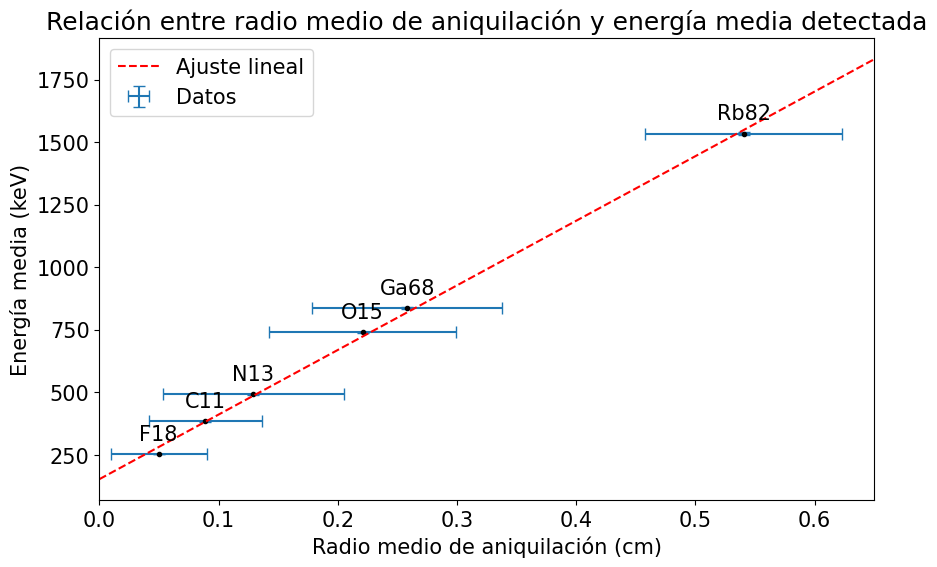

In [81]:
# Some parameters
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
labels = list(df['Isótopo'])

# Data to x, y lists
x = list(df['Media (cm)'])
xerr = list(df['Error (cm)'])
y = list(df['Media (keV)'])
yerr = list(df['Error (keV)'])

# Linear reg

results = stats.linregress(x, y)
x_line = np.linspace(0, 0.65, 100)
y_line = results.intercept + results.slope * x_line

# Plot
plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='None', capsize=4, label='Datos')
plt.plot(x, y, 'k.')

plt.plot(x_line, y_line, 'r--', label=f'Ajuste lineal')

for i, txt in enumerate(labels):
	plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlim(0, 0.65)

plt.xlabel('Radio medio de aniquilación (cm)')
plt.ylabel('Energía media (keV)')
plt.title('Relación entre radio medio de aniquilación y energía media detectada')
plt.legend()
plt.savefig(figures_folder / 'regresion_media_r.pdf', format='pdf')

print(f'Ajuste lineal:')
print(f'Pendiente: {results.slope:.5f} ± {results.stderr:.5f}')
print(f'Intercepto: {results.intercept:.5f} ± {results.intercept_stderr:.5f}')
print(f'Coeficiente de correlación: {results.rvalue:.5f}')
print(f'Coeficiente de determinación: {results.rvalue**2:.5f}')
print(f'P-valor: {results.pvalue}')